# Лабораторная работа 1. Numpy


Версия от 12.09

## Задание 1. Многорукий бандит

Задание суммарно оценивается в 1 балл.


### Постановка задачи о многоруком бандите

Когда-то давно были популярны игровые автоматы, которыми управляли при помощи ручек. Эти автоматы получили прозвище «бандиты», потому что после общения с ними люди обычно чувствовали себя ограбленными. Математики построили математическую модель такого автомата. Так возникла формальная **задача многорукого бандита**. Эта модель активно применяется при построении рекомендательных систем. В качестве ручек рассматриваются фильмы или товары. Если пользователь просмотрел предложение - значит, "мы выиграли" и рекомендация подошла.

Представьте, что вы находитесь в казино перед несколькими игровыми автоматами, и каждый из них настроен с неизвестной вероятностью того, что вы можете получить вознаграждение за одну игру. Возникает вопрос: какова наилучшая стратегия, чтобы получить максимальный выигрыш при условии, что вы не знаете вероятности?

Построим следующую математическую модель. Будем считать, что каждая ручка выдаёт награду 1 с некоторой неизвестной вероятностью $p$, то есть приблизим ручку бернуллиевским распределением $Bern(p)$, которое с течением времени не меняется.

Более формально

- У нас есть $k$ ручек с неизвестными вероятностями "выигрыша" $(\theta_1, \theta_2, \dots, \theta_k)$.
- В каждый момент времени $t$ мы дергаем за одну из ручек и получаем какой-то выигрыш $r_t$ (он может быть равен 0).
- $A$ - множество действий, которые мы предприняли (каждое действие - взаимодействие с одной из ручек бандита). В результате каждого действия $a_i$ мы получаем выигрыш $Q(a_i)$, $E(Q(a_i))=\theta_i$.
- $R$ - функция выигрыша. В нашем случае в каждый момент времени $t$ выигрыш $R(t,Q(a_t))$ равен 1, если мы выиграли, и это произойдет с вероятностью $\theta_i$, или равен 0, если мы проиграли, и это произойдет с вероятностью $1-\theta_i$.

Чтобы решить задачу, нам нужно максимизировать общий выигрыш $\sum r_t$.

В нашем случае достаточно найти лучшую ручку, то есть максимальную вероятность $\theta*$.

При этом функция потерь $L_t = E(\sum_{i=1}^{t}(\theta* - Q(a_t))$


**Упражнение 0:**

Импортируйте NumPy как `np`. Выясните, какая версия NumPy у вас установлена (погуглите, как. есть способ, работающий для любого пакета).

In [1]:
import numpy as np
print(np.__version__)

1.26.4


Для начала создадим базовый класс для многорукого бандита. В нем будет конструктор и функция генерации наград сразу для всех ручек бандита.

In [5]:
class MultiarmedBandit():
    def __init__():
        '''
        Параметры
        k - число ручек
        ...
        '''
        pass

    def generate_reward():
        '''
        Генерация наград для всех ручек сразу
        Выдаётся вектор сгенерированных наград
        '''
        pass

Также создадим класс для алгоритмов, которые будут играть с нашим бандитом. Алгоритм должен уметь предсказывать, какую ручку выбрать следующей. Также при вызове update() алгоритм будет обновлять свои внутренние параметры.

In [3]:
class Algorithm():
    def __init__():
        pass

    def predict(self):
        '''
        Предсказать лучшее действие
        '''
        pass

    def update(self):
        '''
        Обновить внутренние параметры
        '''
        pass

### Бернуллиевский бандит

Этот бандит - один из простейший. На каждом шаге он генерирует награду каждой ручки из бернуллиевского распределения с заданным параметром.

In [6]:
# 0.2 балла
class BernoulliBandit(MultiarmedBandit):
    def __init__(self, k, probas):
        '''
        Добавьте в конструктор параметры
        k - число ручек
        probas - вероятности генерации наград
        '''
        self.k = k
        self.probas = probas

    def generate_reward(self):
        '''
        Генерация наград для всех ручек сразу
        Выдаётся вектор длины k со сгенерированными наградами
        '''
        rewards = []
        for i in range(self.k):
          reward = np.random.binomial(n=1, p=self.probas[i])
          rewards.append(reward)
        return rewards

### Стратегии решения

#### $\epsilon$-greedy

Совсем жадный алгоритм, который выбирает на каждом шаге лучшую ручку, в общем случае будет работать плохо. Сделаем небольшую модернизацию: с вероятностью $1-\epsilon$ будем выбирать текущую лучшую ручку, а с вероятностью $\epsilon$ - какую-то произвольную ручку.

Ценность каждого действия оценивается путем усреднения вознаграждений, связанных с целевым действием a, которые мы наблюдали до текущего временного шага t:

$$\hat Q_t(a) = \dfrac{1}{N_t(a)}\sum^t_{i = 1}r_i I[a_i==a]$$

Здесь $I$ - индикаторная функция, равная 1, если внутри истинное утверждение и 0, если ложное. $N_t(a)$ - количество раз, в которых было выбрано действие $a$.

In [10]:
# 0.2 балла
class EGreedyAlgorithm(Algorithm):
    def __init__(self, k, eps, initial_proba=1.0):
      # параметры - эпсилон и начальные оценки вероятности Q для каждой ручки
      # добавьте k - число ручек
      self.k = k
      self.eps = eps
      self.Q = [initial_proba] * k
      self.N = [0 for _ in range(k)]


    @property
    def estimated_probas(self):
      # возвращаем текущие оценки вероятностей
        return self.Q

    def predict(self):
      # что выбрать?
      if np.random.random() > self.eps:
        # выбираем лучшую ручку
        best_action = np.argmax(self.Q)
      else:
        # выбираем случайную ручку
        best_action =  np.random.randint(self.k)
      return best_action

    def update(self, action, reward):
      # обновляемся! не забудьте добавить в параметры результат взаимодействия
      self.N[action] += 1
      self.Q[action] = (self.Q[action] * (1 - self.eps) + reward * self.eps) / self.N[action]

####  Сэмплирование Томпсона

Сэмплирование Томпсона (иногда его называют алгоритмом байесовых бандитов) работает иначе: вместо уточнения прогноза среднего вознаграждения она расширяет его, чтобы построить вероятностную модель из полученных вознаграждений, а затем выбрать на её основе действие.

Итак, при сэмплировании Томпсона получается модель вероятностей вознаграждения. Когда доступность вознаграждения является бинарной (как в этом случае, да или нет), идеальной моделью для такой вероятности является бета-распределение.

Бета-распределение зависит от двух параметров: $\alpha$ и $\beta$. Проще говоря, это счётчики числа успехов и неудач. Также у бета-распределения есть усреднённое значение, вычисляемое как:

$\frac{\alpha}{\alpha + \beta} = \frac{number-of-successes}{number-of-trials}$

Если мы выиграли, то вознаграждение равно 1, и $\alpha$ — счётчик успехов — увеличивается на 1. $\beta$ - счётчик неудач — не растёт. Если же мы не получим вознаграждение, то $\alpha$ не изменится, а $\beta$ увеличится на 1. Чем больше мы собираем данных, тем сильнее бета-распределение начинает отличаться от прямой линии и становится всё более точной моделью вероятности усреднённого вознаграждения. Поддерживая значения $\alpha$ и $\beta$, алгоритм сэмплирования Томпсона может описать ожидаемое среднее вознаграждение и уровень его достоверности.

Итого, в каждый момент времени мы сэмплируем ожидаемый выигрыш $\hat Q_t(a)$ из априорного бета-распределения $Beta(\alpha_i,\beta_i)$ для каждого действия. Лучшее действие выбирается среди вариантов $a^{TS}_t = argmax_{a \in A}\hat Q(a)$. Затем мы получаем истинное значение выигрыша, и можем соответствующим образом обновить бета-распределение.

$\alpha_i \leftarrow \alpha_i + r_t[a^{TS}_t==a]$

$\beta_i \leftarrow \beta_i + (1-r_t)[a^{TS}_t==a]$

Получаемые нами оценки вознаграждения $\hat Q(a)$ сэмплируются из апостериорных распределений, каждая из получаемых вероятностей эквивалентна вероятности того, что соответствующее действие является оптимальным при условии наблюдаемой истории :)


In [8]:
# 0.3 балла
class ThompsonSamplingAlgorithm(Algorithm):
    def __init__(self, k, init_a=1, init_b=1):
      # начальные значение параметров бандита
      # для оценок используются два вектора параметров - альфы и беты
      # все оценки инициализируются одинаково
      # добавьте k - число ручек
      self.k = k
      self.a = [init_a] * k
      self.b = [init_b] * k

    @property
    def estimated_probas(self):
      return self.a / (self.b + self.a)

    def predict(self):
      samples = np.random.beta(self.a, self.b)
      chosen_action = np.argmax(samples)
      return chosen_action

    def update(self, action, reward):
      self.a[action] += reward
      self.b[action] += 1

### Эксперимент

Запустите ваши алгоритмы на бернулиевском бандите с какими-нибудь фиксированными вероятностями получения награды и сравните результаты. Можете использовать предложенный ниже код.

In [11]:
# взаимодействие бандита и алгоритма
# 0.1 балла

# сначала заводим вектор rewards для хранения наград
arms = 10 # число ручек
probas = [0.2, 0.7, 0.9, 0.8, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
bandit = BernoulliBandit(arms, probas)

algorithms = {}
algorithms['Epsilon-Greedy'] = EGreedyAlgorithm(k=arms,eps=0.1)
algorithms['Thompson Sampling'] = ThompsonSamplingAlgorithm(k=arms)

trials = 10000
rewards = {key:[] for key in algorithms}
mean_rewards = {key:[] for key in algorithms}
action_history = {key:[] for key in algorithms}
arm_percentage = {key:[0]*arms for key in algorithms}


for t in range(trials):
    for alg_name, algorithm in algorithms.items():
        # новые действия
        action = algorithm.predict()
        # собираем все действия - для отладки в случае странностей
        action_history[alg_name].append(action)
        # вектор всех наград
        reward = bandit.generate_reward()[action]
        rewards[alg_name].append(reward)
        # обновление параметров
        algorithm.update(action, reward)
        mean_rewards[alg_name].append(sum(rewards[alg_name][-100:])/100)
        arm_percentage[alg_name][action] += 1

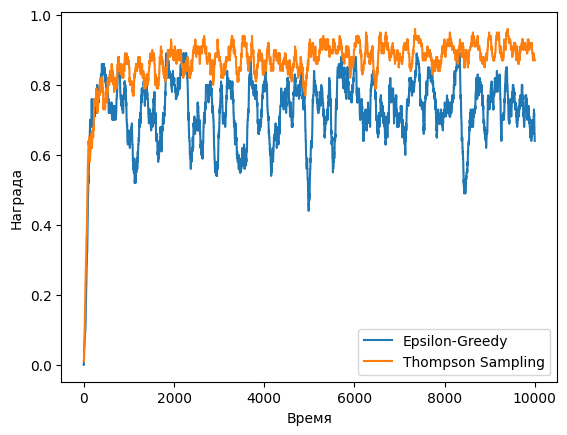

In [19]:
# небольшая визуализация
# 0.2 балла

import matplotlib.pyplot as plt

plt.figure()
plt.plot(np.arange(trials), mean_rewards['Epsilon-Greedy'], label='Epsilon-Greedy') # рисуем время и среднюю награду на отрезке времени от 0 до текущего
plt.plot(np.arange(trials), mean_rewards['Thompson Sampling'], label='Thompson Sampling')
plt.xlabel('Время')
plt.ylabel('Награда')
plt.legend()
plt.show()

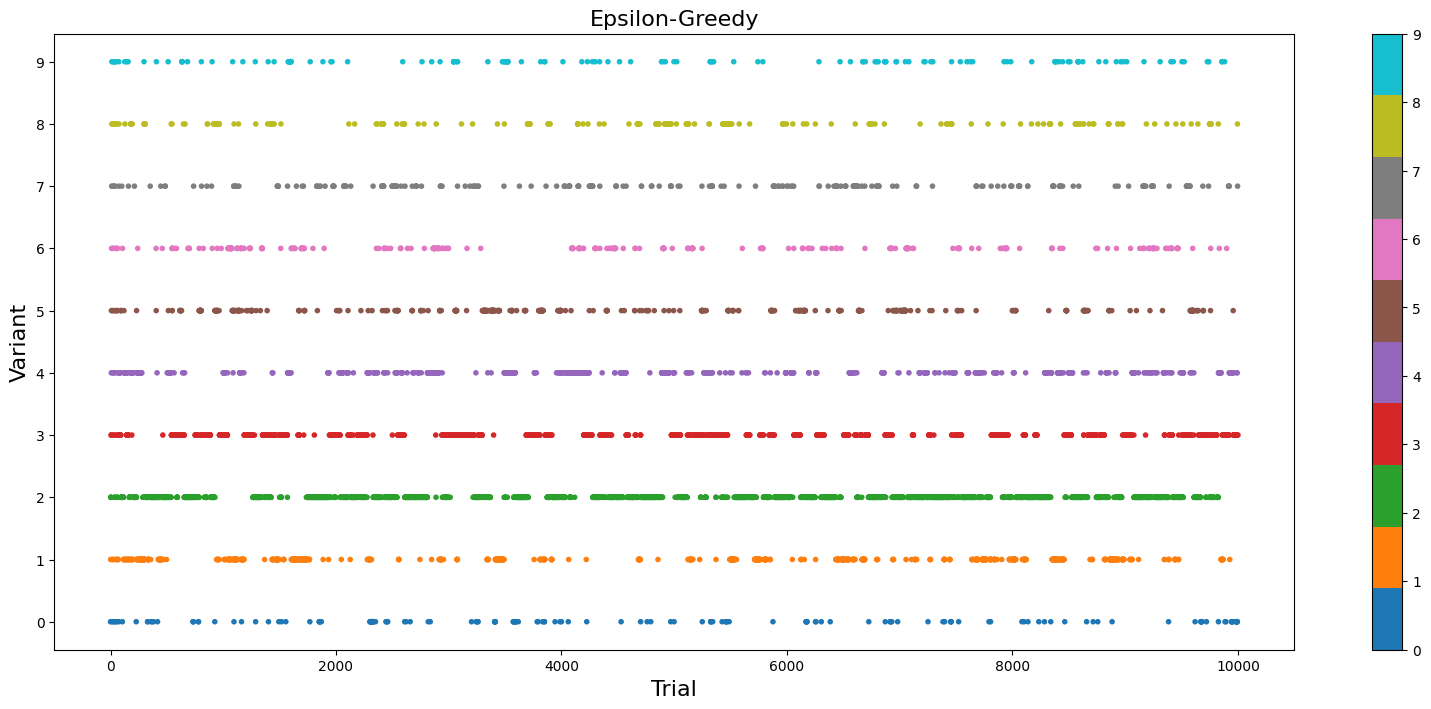

In [31]:
cmap = plt.get_cmap("tab10", 10)
plt.figure(figsize=(20,8))
x = np.arange(trials)
plt.scatter(x, action_history['Epsilon-Greedy'], cmap=cmap, c=action_history['Epsilon-Greedy'], marker=".", alpha=1)
plt.title('Epsilon-Greedy', fontsize=16)
plt.xlabel("Trial", fontsize=16)
plt.ylabel("Variant", fontsize=16)
plt.yticks(list(range(10)))
plt.colorbar()

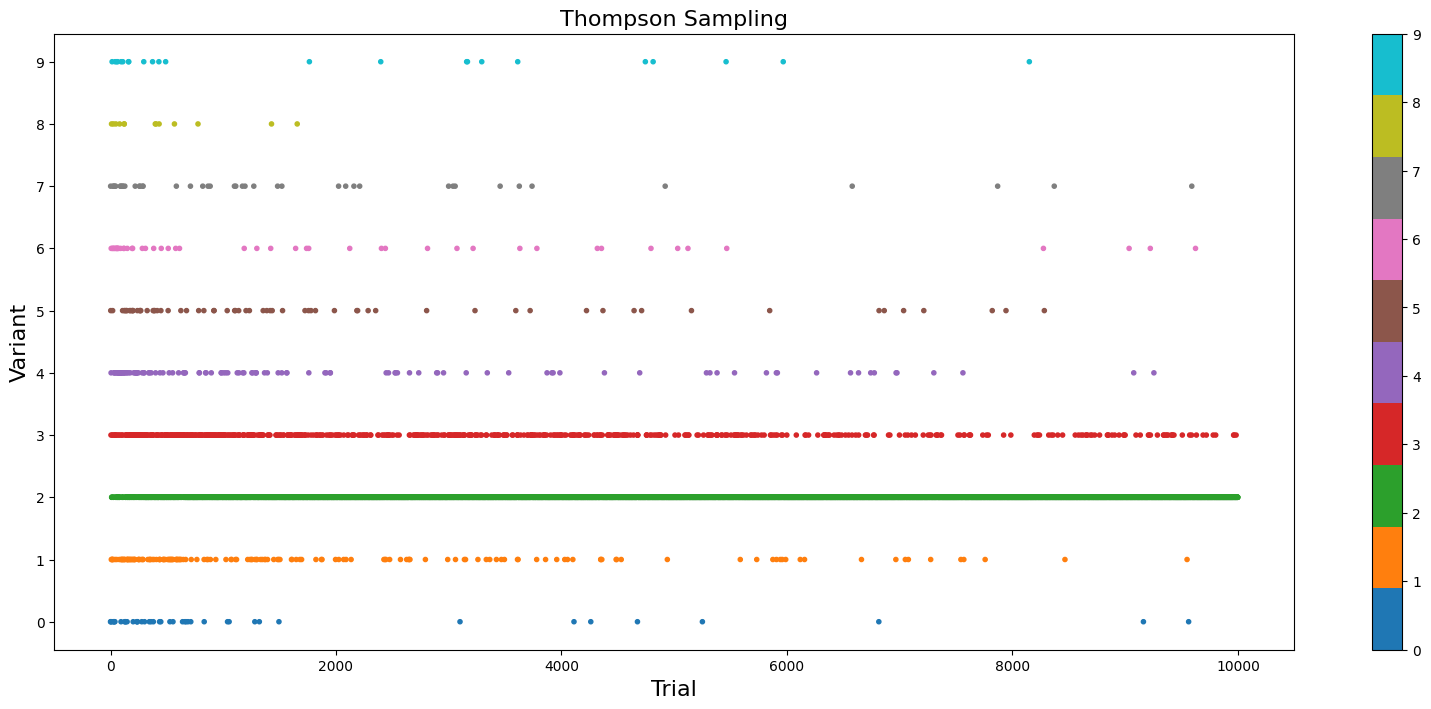

In [32]:
cmap = plt.get_cmap("tab10", 10)
plt.figure(figsize=(20,8))
x = np.arange(trials)
plt.scatter(x, action_history['Thompson Sampling'], cmap=cmap, c=action_history['Thompson Sampling'], marker=".", alpha=1)
plt.title('Thompson Sampling', fontsize=16)
plt.xlabel("Trial", fontsize=16)
plt.ylabel("Variant", fontsize=16)
plt.yticks(list(range(10)))
plt.colorbar()

In [24]:
arm_percentage

{'Epsilon-Greedy': [179, 1053, 3988, 2242, 965, 524, 343, 302, 255, 149],
 'Thompson Sampling': [44, 163, 8834, 649, 118, 66, 48, 42, 13, 23]}

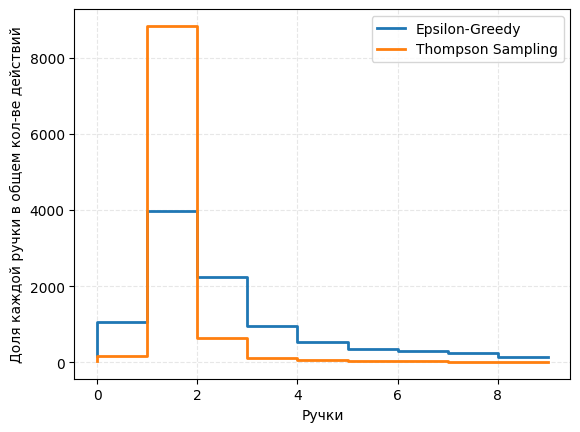

In [27]:
plt.figure()

plt.plot(np.arange(len(probas)), arm_percentage['Epsilon-Greedy'], ds='steps', lw=2, label='Epsilon-Greedy') # рисуем, какую долю всех выборов на текущем шаге занимает выбор конкретной ручки
plt.plot(np.arange(len(probas)), arm_percentage['Thompson Sampling'], ds='steps', lw=2, label='Thompson Sampling')
plt.xlabel('Ручки')
plt.ylabel('Доля каждой ручки в общем кол-ве действий')
plt.legend()
plt.grid('k', ls='--', alpha=0.3)
plt.show()

## Задание 2. Разные задачи

Этот раздел суммарно оценивается в 1 балл. Каждая задача оценивается в 0.125 балла.


## **Упражнение 1**

Выполните следующие действия, используя функциональность numpy.
- создайте три массива - из нулей, единиц и двоек, размера 5 на 6 на 20,
- создайте массив из единиц размера 3 на 10, посчитайте его сумму,
- создайте единичную матрицу 6 на 6, прибавьте к ней матрицу такого же размера с числами от 1 до 6 на диагонали, посчитайте определитель,
- создайте массив 100 на 10 из случайных чисел из нормального распределения с математическим ожиданием 2 и дисперсией 4, посчитайте математическое ожидание и дисперсию для всего массива
- создайте матрицу, у которой на главной диагонали стоят числа 3, 1, 4, 1, 5, 9, 2, 6, и транспонируйте её.


In [ ]:
import numpy as np

arr0 = np.zeros((5, 6, 20))
arr1 = np.ones((5, 6, 20))
arr2 = np.ones((5, 6, 20)) * 2

In [ ]:
arr = np.ones((3, 10))
arr.sum()

30.0

In [ ]:
identity_matrix = np.eye(6)
diag_matrix = np.diag(np.arange(1, 7))
det = np.linalg.det(identity_matrix + diag_matrix)
det

5040.000000000002

In [34]:
normal_array = np.random.normal(loc=2, scale=2, size=(100,10))

In [35]:
np.mean(normal_array) # мат ожидание

1.9980594481032987

In [36]:
np.std(normal_array)

1.93282588378229

In [37]:
 np.var(normal_array) # дисперсия

3.7358158970187905

In [ ]:
matrix = np.diag([3, 1, 4, 1, 5, 9, 2, 6])
np.transpose(matrix)

array([[3, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 4, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 5, 0, 0, 0],
       [0, 0, 0, 0, 0, 9, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 6]])

## **Упражнение 2**

Создайте массив `a` случайных чисел `np.random.randn()` размеров (10,10,10). Для каждого двумерного среза с одной фиксированной координатой (0й, 1й и 2й) найти
- наибольший и наименьший элемент.
- сумму всех положительных элементов.  
- среднее значение и среднеквадратичное отклонение.
- медиану.

In [ ]:
a = np.random.randn(10,10,10)
a0 = a[0, :, :]
a1 = a[:, 1, :]
a2 = a[:, :, 2]
print(a0.max(), a1.max(), a2.max())
print(a0.min(), a1.min(), a2.min())
print(a0[a0>0].sum(), a1[a1>0].sum(), a2[a2>0].sum())
print(a0.mean(), a1.mean(), a2.mean())
print(a0.std(), a1.std(), a2.std())
print(np.median(a0), np.median(a1), np.median(a2))

2.127477247289952 2.3704620735172757 2.127477247289952
-1.6018113345590477 -2.4278702780174672 -2.1264913322517267
47.53921694403502 43.995607068082165 36.296124497076384
0.24827948978548087 0.13022455858152585 -0.10690011172579972
0.8611352434725761 0.9077294603513062 1.0060229112896981
0.15190937684978603 0.1072712863214766 -0.11162948223460992


## **Упражнение 3**

Создайте массив `a` из 10 случайных чисел (float-ов).

Оцените, насколько "экономнее" хранить его как NumPy-массив (а не как `list(a)`). Для этого сгенерируйте массив `a` из 10, 100, ..., $10^6$ таких случайных чисел и вычислите долю размера `a` от размера `list(a)`.

_Размер в памяти какого-то обьекта в Python можно определить функцией из библиотеки `sys` – системных утилит._

In [ ]:
a = np.random.random(10)
a

array([0.3422428 , 0.93663709, 0.41912369, 0.80351294, 0.64337508,
       0.34096509, 0.63268345, 0.70889291, 0.41123388, 0.602247  ])

In [ ]:
import sys

def getSize(array):
    return sys.getsizeof(array) + len(array) * sys.getsizeof(array[0])

for i in range(1, 7):
  print(sys.getsizeof(np.random.random(10 ** i)) / getSize(list(np.random.random(10 ** i))))

0.42105263157894735
0.22485207100591717
0.2025164769322948
0.2002519647249385
0.20002519964720494
0.200002519996472


## **Упражнение 4**

Давайте исследуем механизм broadcasting.

Попробуйте сложить значения пар массивов следующих размеров

- 4x3x5 и 3x5
- 4x3x5 и 4x5
- 4x3x5 и 5
- 4x3x5 и 4
- 4 и 4x3x5

Когда механизм срабатывает, а когда - нет?

Исправьте размеры массивов так, чтобы механизм срабатывал.

In [ ]:
b = np.ones((4, 3, 5))
c = np.ones((3, 5))
d = np.ones((4, 5))
e = np.ones(5)
f = np.ones(4)

In [ ]:
b + c

array([[[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]],

       [[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]],

       [[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]],

       [[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]]])

In [ ]:
b + d

ValueError: operands could not be broadcast together with shapes (4,3,5) (4,5) 

In [ ]:
b.reshape((-1, 4, 5)) + d

array([[[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]],

       [[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]],

       [[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]]])

In [ ]:
b + e

array([[[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]],

       [[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]],

       [[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]],

       [[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]]])

In [ ]:
b + f

ValueError: operands could not be broadcast together with shapes (4,3,5) (4,) 

In [ ]:
b.reshape((3, 5, 4)) + f

array([[[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]],

       [[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]],

       [[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]]])

In [ ]:
f + b

ValueError: operands could not be broadcast together with shapes (4,) (4,3,5) 

In [ ]:
f.reshape((4, 1, 1)) + b

array([[[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]],

       [[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]],

       [[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]],

       [[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]]])

## **Упражнение 5**

Создайте массив случайных чисел из стандартного нормального распределения размера 100. Замените отрицательные числа в этом массиве на нули, используя а) булевскую маску, б) np.where. Затем получите из матрицы две квадратные, используя два разных вида развертывания (C и F). Затем разверните первую матрицу обратно в одномерный массив.

In [ ]:
normal_array = np.random.normal(loc=0, scale=1, size=100)
normal_array

array([ 1.21265691, -0.97126754, -0.17807147,  1.23567006,  1.08560302,
       -0.54261942, -0.93464717, -0.47030775,  0.10341053,  1.2676989 ,
       -1.16282449,  0.01426062, -1.29609032,  0.07832247,  0.437328  ,
       -0.00551951, -1.04444393, -0.07699227, -1.89459613,  0.78448997,
        0.52642876,  0.12841812, -1.19925096,  0.64037269, -1.43196958,
       -1.75333376, -2.07278552, -1.32485155,  1.51585444,  0.15255289,
        1.30630946, -0.77586962,  1.42077318,  0.95955567,  0.94286325,
       -1.94031107, -0.096762  ,  0.69329882,  0.76119183, -1.27593324,
        0.32540963, -0.05300776,  0.21532319, -0.52766862, -1.56176217,
       -0.65570336,  0.05813173, -0.81839395,  2.05970563, -1.41679922,
       -1.05211326, -0.10537532,  0.53506622,  2.83847356,  0.79644549,
        1.06668042, -0.70156311,  0.00791913,  0.9985891 , -2.22009058,
       -1.72013288, -0.00730411,  0.73493229, -0.44765501, -0.7835007 ,
        1.22482927, -0.07982889, -1.84974749, -2.40480217,  1.07

In [ ]:
normal_array[normal_array<0] = 0
normal_array

array([1.21265691, 0.        , 0.        , 1.23567006, 1.08560302,
       0.        , 0.        , 0.        , 0.10341053, 1.2676989 ,
       0.        , 0.01426062, 0.        , 0.07832247, 0.437328  ,
       0.        , 0.        , 0.        , 0.        , 0.78448997,
       0.52642876, 0.12841812, 0.        , 0.64037269, 0.        ,
       0.        , 0.        , 0.        , 1.51585444, 0.15255289,
       1.30630946, 0.        , 1.42077318, 0.95955567, 0.94286325,
       0.        , 0.        , 0.69329882, 0.76119183, 0.        ,
       0.32540963, 0.        , 0.21532319, 0.        , 0.        ,
       0.        , 0.05813173, 0.        , 2.05970563, 0.        ,
       0.        , 0.        , 0.53506622, 2.83847356, 0.79644549,
       1.06668042, 0.        , 0.00791913, 0.9985891 , 0.        ,
       0.        , 0.        , 0.73493229, 0.        , 0.        ,
       1.22482927, 0.        , 0.        , 0.        , 1.07074263,
       0.10425639, 1.41617388, 0.        , 0.18456131, 0.     

In [ ]:
normal_array = np.where(normal_array < 0, 0, normal_array)
normal_array

array([1.21265691, 0.        , 0.        , 1.23567006, 1.08560302,
       0.        , 0.        , 0.        , 0.10341053, 1.2676989 ,
       0.        , 0.01426062, 0.        , 0.07832247, 0.437328  ,
       0.        , 0.        , 0.        , 0.        , 0.78448997,
       0.52642876, 0.12841812, 0.        , 0.64037269, 0.        ,
       0.        , 0.        , 0.        , 1.51585444, 0.15255289,
       1.30630946, 0.        , 1.42077318, 0.95955567, 0.94286325,
       0.        , 0.        , 0.69329882, 0.76119183, 0.        ,
       0.32540963, 0.        , 0.21532319, 0.        , 0.        ,
       0.        , 0.05813173, 0.        , 2.05970563, 0.        ,
       0.        , 0.        , 0.53506622, 2.83847356, 0.79644549,
       1.06668042, 0.        , 0.00791913, 0.9985891 , 0.        ,
       0.        , 0.        , 0.73493229, 0.        , 0.        ,
       1.22482927, 0.        , 0.        , 0.        , 1.07074263,
       0.10425639, 1.41617388, 0.        , 0.18456131, 0.     

In [ ]:
normal_array_C = np.reshape(normal_array, (10, 10), order='C')
normal_array_C

array([[1.21265691, 0.        , 0.        , 1.23567006, 1.08560302,
        0.        , 0.        , 0.        , 0.10341053, 1.2676989 ],
       [0.        , 0.01426062, 0.        , 0.07832247, 0.437328  ,
        0.        , 0.        , 0.        , 0.        , 0.78448997],
       [0.52642876, 0.12841812, 0.        , 0.64037269, 0.        ,
        0.        , 0.        , 0.        , 1.51585444, 0.15255289],
       [1.30630946, 0.        , 1.42077318, 0.95955567, 0.94286325,
        0.        , 0.        , 0.69329882, 0.76119183, 0.        ],
       [0.32540963, 0.        , 0.21532319, 0.        , 0.        ,
        0.        , 0.05813173, 0.        , 2.05970563, 0.        ],
       [0.        , 0.        , 0.53506622, 2.83847356, 0.79644549,
        1.06668042, 0.        , 0.00791913, 0.9985891 , 0.        ],
       [0.        , 0.        , 0.73493229, 0.        , 0.        ,
        1.22482927, 0.        , 0.        , 0.        , 1.07074263],
       [0.10425639, 1.41617388, 0.       

In [ ]:
normal_array_F = np.reshape(normal_array, (10, 10), order='F')
normal_array_F

array([[1.21265691, 0.        , 0.52642876, 1.30630946, 0.32540963,
        0.        , 0.        , 0.10425639, 0.        , 0.71494757],
       [0.        , 0.01426062, 0.12841812, 0.        , 0.        ,
        0.        , 0.        , 1.41617388, 0.        , 0.56565339],
       [0.        , 0.        , 0.        , 1.42077318, 0.21532319,
        0.53506622, 0.73493229, 0.        , 0.9614188 , 0.24848701],
       [1.23567006, 0.07832247, 0.64037269, 0.95955567, 0.        ,
        2.83847356, 0.        , 0.18456131, 0.        , 1.04219604],
       [1.08560302, 0.437328  , 0.        , 0.94286325, 0.        ,
        0.79644549, 0.        , 0.        , 0.09683364, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.06668042, 1.22482927, 0.90427574, 0.        , 0.66074696],
       [0.        , 0.        , 0.        , 0.        , 0.05813173,
        0.        , 0.        , 0.        , 1.06744196, 0.        ],
       [0.        , 0.        , 0.       

In [ ]:
normal_array_C = normal_array_C.flatten()

In [ ]:
normal_array_C.shape

(100,)

## **Упражнение 6**

Создайте 4 матрицы
- A из единиц, размера 3 на 4,
- В из нулей, размера 5 на 4,
- C - "шахматную" из нулей и единиц, размера 4 на 3, первое значение 0,
- D из чисел от 1 до 12, записанных в виде змейки, размера 4 на 3.

Создайте из этих матриц "лоскутную" матрицу

A C

B D

используя только стандартные операции numpy. Comprehensions использовать нельзя.

In [ ]:
A = np.ones((3, 4))
B = np.zeros((5, 4))
C = np.zeros((4, 3))
C[0::2,1::2] = 1
C[1::2,::2] = 1
D = np.arange(1, 13).reshape((4, 3))
D[1::2, ::] = D[1::2, ::-1]

In [ ]:
np.hstack((np.vstack((A, B)), np.vstack((C, D))))

array([[ 1.,  1.,  1.,  1.,  0.,  1.,  0.],
       [ 1.,  1.,  1.,  1.,  1.,  0.,  1.],
       [ 1.,  1.,  1.,  1.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.,  2.,  3.],
       [ 0.,  0.,  0.,  0.,  6.,  5.,  4.],
       [ 0.,  0.,  0.,  0.,  7.,  8.,  9.],
       [ 0.,  0.,  0.,  0., 12., 11., 10.]])

## **Упражнение 7**

Создайте массив случайных чисел длины 50. Используйте равномерное распределение на отрезке от нуля до единицы.

Далее, создайте массив случайных целых чисел такого же размера. Отсортируйте первый массив, используя значения из второго как ключи. Используйте сортировку и лямбда-функцию.

Далее, сделайте из этого массива массив ширины 5, а затем измените его тип на целочисленный.


In [2]:
import numpy as np

In [38]:
random1 = np.random.uniform(0, 1, 50)
random2 = np.random.uniform(0, 1, 50)
random2_dict = dict(zip(random1, random2))
sorted_random1 = np.array(sorted(random1, key=lambda key: random2_dict[key]))
sorted_random1 = sorted_random1.reshape((-1, 5))
int_sorted_random1 = sorted_random1.astype(int)

In [ ]:
sorted_random1

array([[0.01022775, 0.04217432, 0.08289262, 0.09851017, 0.10423737],
       [0.1320699 , 0.15729886, 0.16521463, 0.1752892 , 0.23886264],
       [0.24622293, 0.25029833, 0.28457008, 0.32246675, 0.32894002],
       [0.33175714, 0.34103503, 0.38689243, 0.39834777, 0.46282944],
       [0.46580914, 0.48535946, 0.48642637, 0.48862447, 0.52470953],
       [0.56737328, 0.5705774 , 0.58028508, 0.58352361, 0.59080889],
       [0.59618561, 0.66078673, 0.67863246, 0.71578229, 0.728008  ],
       [0.73350278, 0.74582146, 0.74957744, 0.76926301, 0.77867284],
       [0.78374005, 0.82710724, 0.83191177, 0.83820503, 0.88082374],
       [0.89686344, 0.94293759, 0.94461782, 0.95808998, 0.97859879]])

In [ ]:
int_sorted_random1

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

## **Упражнение 8**

_**(Сначала пара подсказок)**_

_Вот так можно отобразить элементы матрицы. Цветовую схему я выбрал оттенки серого, т.к значения тут все положительные._



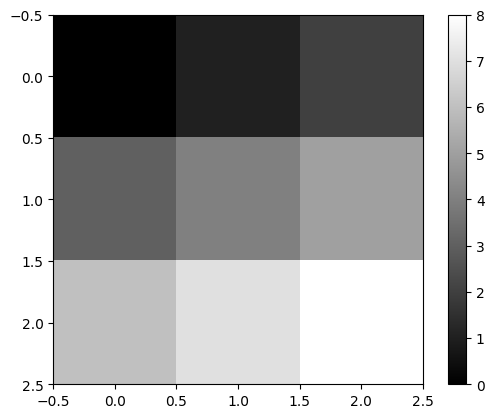

In [ ]:
import matplotlib.pyplot as plt

a = np.arange(9).reshape(3,3)

plt.imshow(a, cmap = 'gray')
plt.colorbar()

_Допустим, вы хотите построить вот такой "график" (вид сверху, интенсивность серого кодирует высоту графика) функции от двух переменных, $x$ и $y$. Вы хотите, чтобы $x$ и $y$ принимали значения от $0$ до $1$, и вам достаточно в этом интервале вычислить функцию в 100 точках (10 шагов по $x$, 10 шагов по $y$, итого шаг решетки – $0.1$). Вот, как это можно сделать (командой `np.meshgrid()`):_

In [ ]:
ps = np.arange(0,1,0.1)

xs, ys = np.meshgrid(ps,ps)

In [ ]:
xs

array([[0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
       [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
       [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
       [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
       [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
       [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
       [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
       [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
       [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
       [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]])

In [ ]:
ys

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2],
       [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3],
       [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6],
       [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7],
       [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8],
       [0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9]])

_(Посмотрите, как выглядят массивы `xs` и `ys`)_

**_Теперь задание:_**
Постройте вот такой "двумерный" график в оттенках серого функции $I(x,y)$ (I for intensity) расстояния от центра координат

$$I = \sqrt{x^2 + y^2}$$

Для $(x,y)$ от $-1$ до $1$, с шагом 0.05.

Покажите на этом графике область, где $I < 0.5$

_(Если интенсивность идет от белого к черному с возрастанием значения – поменяйте знак всего массива интенсивностей, чтобы область $I < 0.5$ была окрашена оттенками серого, а внешняя часть – была белой_

In [ ]:
ps = np.arange(-1,1,0.05)

xs, ys = np.meshgrid(ps,ps)

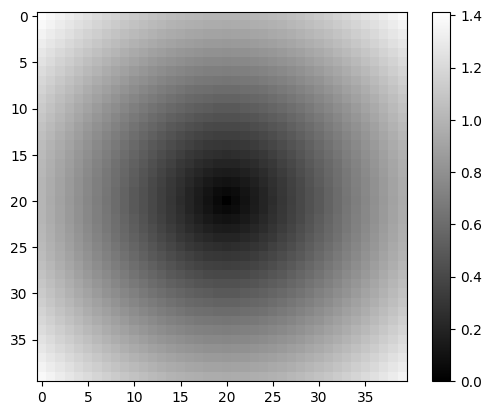

In [ ]:
plt.imshow(I, cmap = 'gray')
plt.colorbar()

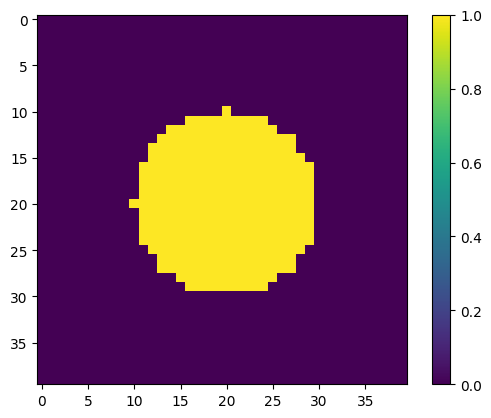

In [ ]:
plt.imshow(I<0.5)
plt.colorbar()

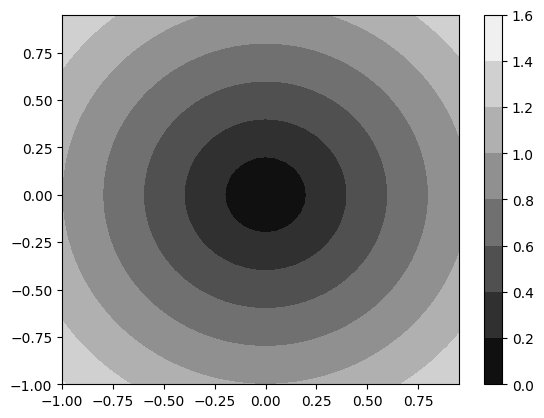

In [ ]:
I = np.sqrt(xs**2 + ys**2)
plt.contourf(xs, ys, I, cmap = 'gray')
plt.colorbar()

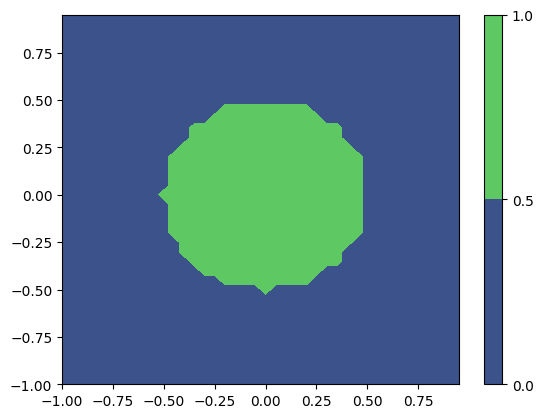

In [ ]:
plt.contourf(xs, ys, I<0.5)
plt.colorbar()